In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv(r"D:\study\paper\ubiquitination\human\feature_combine\human_train_feature_combine.csv")

In [3]:
all_feature_name = data.columns.tolist()[1:]

In [4]:
all_matrix = np.zeros((1,6))

In [5]:
for f in all_feature_name:
    if 'Binary' in f:
        all_matrix[0,0] += 1
    elif 'PWM' in f:
        all_matrix[0,1] += 1
    elif 'EAAC' in f:
        all_matrix[0,2] += 1
    elif 'CKSAAP' in f:
        all_matrix[0,3] += 1
    elif 'AA531' in f:
        all_matrix[0,4] += 1
    elif 'PSSM' in f:
        all_matrix[0,5] += 1

In [6]:
all_matrix

array([[  620.,    31.,   540.,  2000., 16461.,   620.]])

In [7]:
greater_than_zero_data = pd.read_csv(r"C:\Users\Li Xiaokang\Desktop\null_importances_result\score_df\human_final_score_win31.csv")

In [8]:
greater_than_0_feature_name = greater_than_zero_data['feature'].tolist()

In [9]:
greater_than_0_matrix = np.zeros((1,6))

In [10]:
for f in greater_than_0_feature_name:
    if 'Binary' in f:
        greater_than_0_matrix[0,0] += 1
    elif 'PWM' in f:
        greater_than_0_matrix[0,1] += 1
    elif 'EAAC' in f:
        greater_than_0_matrix[0,2] += 1
    elif 'CKSAAP' in f:
        greater_than_0_matrix[0,3] += 1
    elif 'AA531' in f:
        greater_than_0_matrix[0,4] += 1
    elif 'PSSM' in f:
        greater_than_0_matrix[0,5] += 1

In [11]:
greater_than_0_matrix

array([[  297.,    30.,   422.,  1161., 15540.,   620.]])

In [12]:
zero_matrix = all_matrix - greater_than_0_matrix

In [13]:
zero_matrix

array([[323.,   1., 118., 839., 921.,   0.]])

In [14]:
top5_data = pd.read_csv(r"C:\Users\Li Xiaokang\Desktop\null_importances_result\train_test\train_human_0.05.csv")

In [15]:
top5_feature_name = top5_data.columns.tolist()[1:]

In [16]:
top5_matrix = np.zeros((1,6))

In [17]:
for f in top5_feature_name:
    if 'Binary' in f:
        top5_matrix[0,0] += 1
    elif 'PWM' in f:
        top5_matrix[0,1] += 1
    elif 'EAAC' in f:
        top5_matrix[0,2] += 1
    elif 'CKSAAP' in f:
        top5_matrix[0,3] += 1
    elif 'AA531' in f:
        top5_matrix[0,4] += 1
    elif 'PSSM' in f:
        top5_matrix[0,5] += 1

In [18]:
top5_matrix

array([[ 70.,  30.,  54., 129., 613.,   8.]])

In [19]:
top5_0_matrix = greater_than_0_matrix - top5_matrix
top5_0_matrix

array([[  227.,     0.,   368.,  1032., 14927.,   612.]])

In [20]:
plot_matrix = np.zeros((3,6))

In [21]:
plot_matrix[0,:] = top5_matrix / all_matrix

In [22]:
plot_matrix[1,:] = top5_0_matrix / all_matrix

In [23]:
plot_matrix[2,:] = zero_matrix / all_matrix
plot_matrix

array([[0.11290323, 0.96774194, 0.1       , 0.0645    , 0.03723954,
        0.01290323],
       [0.36612903, 0.        , 0.68148148, 0.516     , 0.90681004,
        0.98709677],
       [0.52096774, 0.03225806, 0.21851852, 0.4195    , 0.05595043,
        0.        ]])

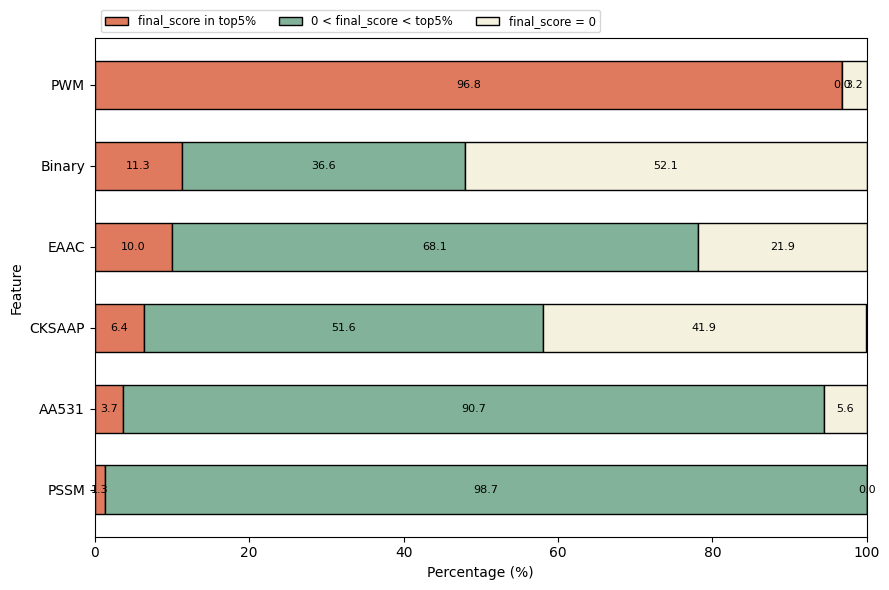

In [25]:
import matplotlib.pyplot as plt
import numpy as np

category_names = ['final_score in top5%', '0 < final_score < top5%', 'final_score = 0']

results = {
    'PWM': np.round(plot_matrix[:, 1] * 100, decimals=1),
    'Binary': np.round(plot_matrix[:, 0] * 100, decimals=1),
    'EAAC': np.round(plot_matrix[:, 2] * 100, decimals=1),
    'CKSAAP': np.round(plot_matrix[:, 3] * 100, decimals=1),
    'AA531': np.round(plot_matrix[:, 4] * 100, decimals=1),
    'PSSM': np.round(plot_matrix[:, 5] * 100, decimals=1)
}

def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = ['#DF7A5E', '#82B29A', '#F4F1DE']
    fig, ax = plt.subplots(figsize=(9, 6))  # 调整图形尺寸
    ax.invert_yaxis()

    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):

        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.6,
                        label=colname, color=color, edgecolor='black')

        text_color = 'black'
        ax.bar_label(rects, labels=widths, label_type='center', color=text_color, fontsize=8)  # 添加标签并设置字体大小

    
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1), loc='lower left', fontsize='small')
    
    ax.set_ylabel('Feature')  # 添加Y轴标签
    ax.set_xlabel('Percentage (%)')  # 添加X轴标签

    plt.tight_layout()  # 调整图形布局

    return fig, ax


survey(results, category_names)
plt.savefig('Fig 6-human_proportion.pdf', format='pdf', dpi=1200)  # 保存为EPS格式的向量图，并设置dpi
plt.show()
